## Preparing new samples


ORIGINAL IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



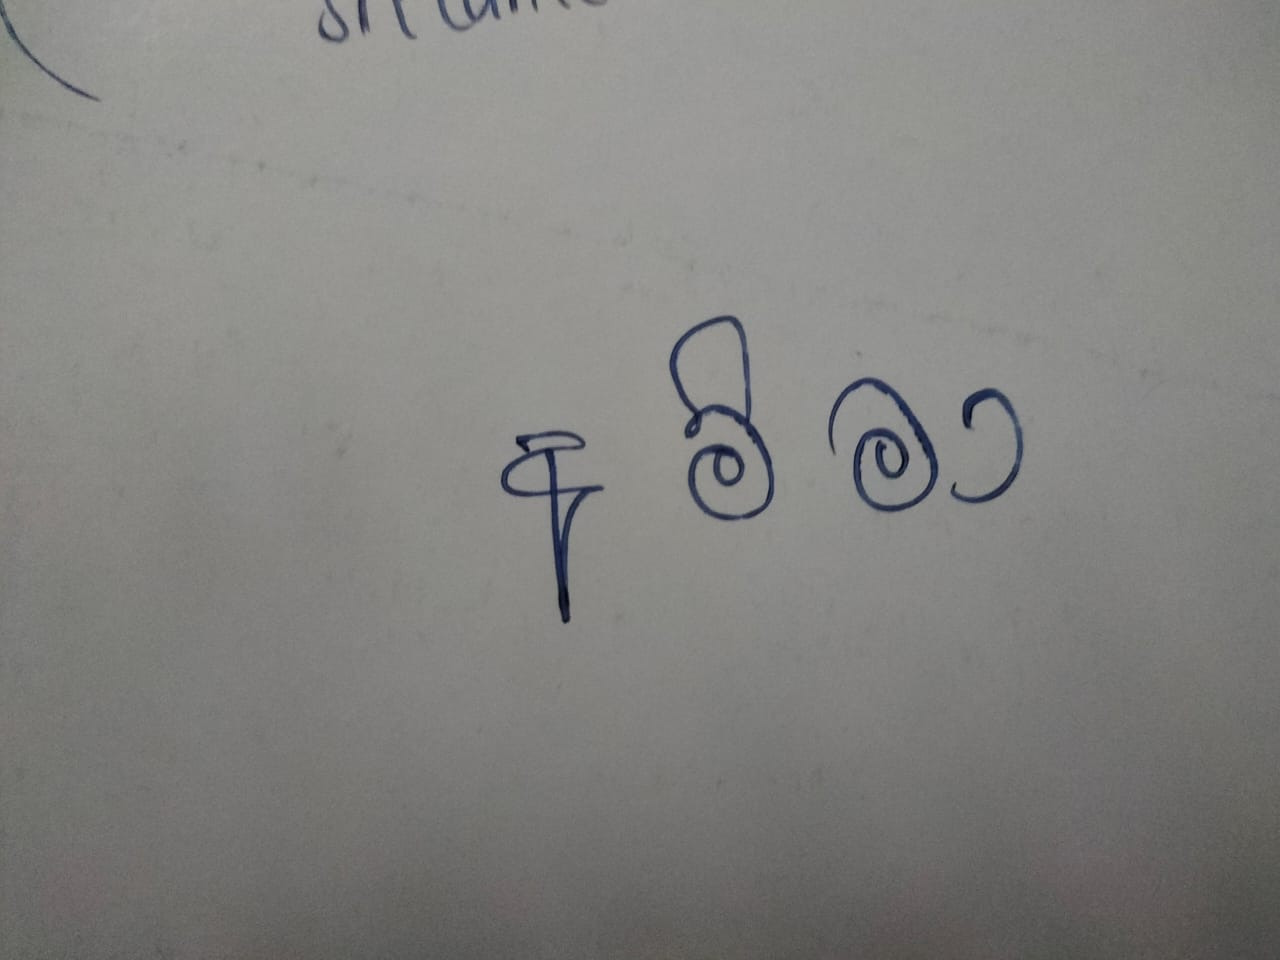


RESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



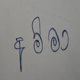


GRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



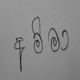

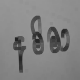


CONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



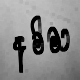


CONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->



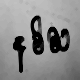


BINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



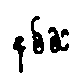

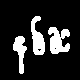

In [6]:
from IPython.display import display, Image

# Path to your image file
image1_path = 'amma.jpg'  # Replace 'example_image.jpg' with the actual filename

print("\nORIGINAL IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
# Display the image
display(Image(filename=image1_path))

# Crop -----------------------------------------------------------------------------------//
from PIL import Image

def crop_and_display(input_path, crop_box):
    """
    Crop an image and display both the original and cropped images.
    
    Args:
        input_path (str): Path to the input image file.
        crop_box (tuple): A tuple (left, upper, right, lower) defining the
                         pixel coordinates of the crop box.
    """
    image = Image.open(input_path)
    
    # Display original image
    print("Original Image:")
    
    # image.show()
    
    # Crop image
    cropped_image = image.crop(crop_box)
    
    # Display cropped image
    print("Cropped Image:")
    display(cropped_image)
    display(image)
    # cropped_image.show()

# Resize ---------------------------------------------------------------------------//
from PIL import Image

# Path to your original image
original_image = Image.open('amma_cropped.jpg')

# Resize the img to 80x80
resized_image = original_image.resize((80,80))

print("\nRESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
# Display resized img
display(resized_image)

# Convert to grayscale ---------------------------------------------------------------------------------------------------------------------------------------------------//
grayscale_image = resized_image.convert('L')

print("\nGRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display grayscale img
display(grayscale_image)

import numpy as np
import cv2
# Convert it to a NumPy array
binary_image_array = np.array(grayscale_image)

# Invert the binary image
inverted_image_array = cv2.bitwise_not(binary_image_array)

# Define the kernel for dilation
kernel_size = 3  # Adjust this value to control the thickness
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform morphological dilation
dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)

# Invert the dilated image back to its original orientation
dilated_image_array = cv2.bitwise_not(dilated_inverted_image_array)

# Convert the dilated NumPy array back to a PIL Image object
dilated_image = Image.fromarray(dilated_image_array)

# Display the dilated image
display(dilated_image)

from PIL import ImageEnhance 

# Enhace the contrast of grayscale img
enhancer = ImageEnhance.Contrast(dilated_image)
contrast_factor = 3
contrast_enhanced_image = enhancer.enhance(contrast_factor)

print("\nCONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

display(contrast_enhanced_image)

# Convert contrast_enhanced_image to numpy array
contrast_enhanced_image_array = np.array(contrast_enhanced_image)

# Perform median blur filtering
median_blur_kernel_size = 3  # Keep an Odd value. 
filtered_image = cv2.medianBlur(contrast_enhanced_image_array, median_blur_kernel_size)

# Convert the filtered numpy array back to a PIL Image object
filtered_image_pil = Image.fromarray(filtered_image)

print("\nCONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display the contrast enhanced image after median blur filtering
display(filtered_image_pil)

import cv2 
import numpy as np

# Convert to numpy array
contrast_enhanced_image_array = np.array(filtered_image_pil)

# Perform thresholding to binarize the image
threshold_value = 40
_, binary_image_array = cv2.threshold(contrast_enhanced_image_array, threshold_value, 255, cv2.THRESH_BINARY)

# Convert the binary NumPy array back to a PIL Image Obj
binary_image = Image.fromarray(binary_image_array)

print("\nBINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display binary image
display(binary_image)

# Convert it to a NumPy array
binary_image_array = np.array(binary_image)

# Invert the binary image
inverted_image_array = cv2.bitwise_not(binary_image_array)

# Define the kernel for dilation
kernel_size = 2  # Adjust this value to control the thickness
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform morphological dilation
dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)

# Convert the dilated NumPy array back to a PIL Image object
dilated_image = Image.fromarray(dilated_inverted_image_array)

# Display the dilated image
display(dilated_image)